# STOCHASTIC GRADIENT

Tensor("Mean_9:0", shape=(), dtype=float32)
Step #200 A = [5.238103]
Loss = [[0.00014074]]
Step #400 A = [1.3862295]
Loss = [[0.87919825]]
Step #600 A = [-0.19489081]
Loss = [[0.11064456]]
Step #800 A = [-0.8208301]
Loss = [[0.12013699]]
Step #1000 A = [-0.9292631]
Loss = [[0.12313244]]
Step #1200 A = [-0.93065053]
Loss = [[0.11983911]]
Step #1400 A = [-0.9901449]
Loss = [[0.06081994]]


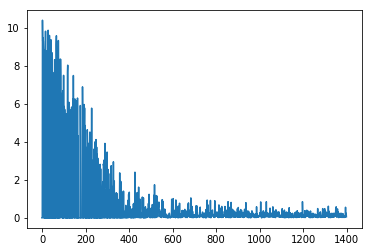

In [10]:



import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt




x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.normal(3, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))                             


# In[3]:


my_output = tf.add(x_data, A)


# In[4]:


my_output_expanded = tf.expand_dims(my_output, 0)
y_target_expanded = tf.expand_dims(y_target, 0)


# In[5]:


init = tf.global_variables_initializer()


# In[24]:


xentropy = tf.nn.sigmoid_cross_entropy_with_logits( logits = my_output_expanded, labels = y_target_expanded)
cost = tf.reduce_mean(xentropy)
print(cost)


# In[25]:


my_opt = tf.train.GradientDescentOptimizer(learning_rate = 0.05)
train_step = my_opt.minimize(cost)


# In[81]:


total_loss = []
with tf.Session() as sess:
    sess.run(init)
    losses = 0
    for i in range(1400):
        rand_index = np.random.choice(100)
        rand_x = [x_vals[rand_index]]
        rand_y = [y_vals[rand_index]]
        b = sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
        loss = sess.run(xentropy, feed_dict={x_data: rand_x, y_target:rand_y})
        if (i+1)%200==0:
            print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
            print('Loss = ' + str(loss))
        total_loss.append(loss)




a = np.array(total_loss)
a  = a.reshape([1400,1])





a.shape

# In[84]:


plt.plot(a)

